# DTSC Project 2: 
* Name: Jason Ortiz
* NYIT ID: 1258640
* Due: 12/12/2022 @ 11:59PM
* Professor: Kiran Balgani

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

## Data Prepping

In [64]:
original_spam_df = pd.read_csv('spam.csv', sep=',')

In [65]:
original_spam_df

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Class
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.178,0.0,0.044,0.000,0.00,1.666,10,180,ham
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.125,0.0,0.000,0.000,0.00,1.510,10,74,ham
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.718,11,55,ham
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.006,0.159,0.0,0.069,0.221,0.11,3.426,72,819,spam
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.000,0.0,0.263,0.000,0.00,1.428,4,20,spam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.00,0.00,0.53,0.0,0.00,0.53,0.00,0.00,0.00,0.53,...,0.000,0.101,0.0,0.000,0.000,0.00,1.857,16,52,ham
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.443,0.0,0.221,0.665,0.00,3.812,15,61,spam
4598,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.000,1,3,ham
4599,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.218,0.0,0.218,0.000,0.00,1.687,10,27,ham


In [66]:
original_spam_df.shape

(4601, 58)

In [67]:
original_spam_df.describe()

,make,address,all,3d,our,over,remove,internet,order,mail,...,conference,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


In [68]:
original_spam_df["Class"].unique()

array(['ham', 'spam'], dtype=object)

Indicates this is a Binary Classification Problem ^

In [69]:
non_class_features = original_spam_df.columns.delete(-1)
non_class_features

Index(['make', 'address', 'all', '3d', 'our', 'over', 'remove', 'internet',
       'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses',
       'free', 'business', 'email', 'you', 'credit', 'your', 'font', '0',
       'money', 'hp', 'hpl', 'george', '650', 'lab', 'labs', 'telnet', '857',
       'data', '415', '85', 'technology', '1999', 'parts', 'pm', 'direct',
       'cs', 'meeting', 'original', 'project', 're', 'edu', 'table',
       'conference', 'semicol', 'paren', 'bracket', 'bang', 'dollar', 'pound',
       'cap_avg', 'cap_long', 'cap_total'],
      dtype='object')

In [70]:
spam_training_set, spam_test_set = train_test_split(original_spam_df, test_size=0.7826559, random_state=99)

In [71]:
spam_training_data, spam_training_target = spam_training_set[non_class_features], spam_training_set['Class']
spam_test_data, spam_test_target = spam_test_set[non_class_features], spam_test_set['Class']

In [72]:
print(f'{spam_training_data.shape = }\n{spam_test_data.shape = }')

spam_training_data.shape = (1000, 57)
spam_test_data.shape = (3601, 57)


In [73]:
spam_training_data.head()
#spam_training_target.head()
#spam_test_data.head()
#spam_test_target.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,conference,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total
466,0.00,0.0,0.87,0.0,0.00,0.0,0.00,0.0,0.00,0.87,...,0.0,0.0,0.608,0.0,0.000,0.000,0.0,2.941,11,100
1663,0.00,0.0,0.44,0.0,1.32,0.0,0.44,0.0,0.00,1.32,...,0.0,0.0,0.301,0.0,0.301,0.000,0.0,2.787,19,131
46,0.00,0.0,1.58,0.0,0.00,0.0,0.00,0.0,0.00,0.00,...,0.0,0.0,0.149,0.0,0.149,0.000,0.0,1.482,10,43
3499,0.33,0.0,1.65,0.0,0.99,0.0,0.33,0.0,0.66,1.32,...,0.0,0.0,0.000,0.0,0.859,0.101,0.0,337.250,1146,1349
1163,0.00,0.0,0.31,0.0,0.00,0.0,0.00,0.0,0.00,0.00,...,0.0,0.0,0.588,0.0,0.000,0.000,0.0,3.183,55,191


In [74]:
def rate_classifier(test_target_data, test_target_predict):
    cm = confusion_matrix(test_target_data, test_target_predict)

    terminology = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    percentages = ["{0:0.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(terminology, counts, percentages)]
    labels = np.asarray(labels).reshape(2,2)

    plt.figure(figsize=(10,7))
    sb.heatmap(cm/np.sum(cm), annot=labels, fmt='', cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Truth')

    print("Classification Report\n", classification_report(test_target_data, test_target_predict))

    print("Accuracy Score\n", accuracy_score(test_target_data, test_target_predict))

## Fused Majority Voting Rule Classifier

In [75]:
decision_tree_classifier = DecisionTreeClassifier().fit(spam_training_data, spam_training_target)
gauss_nb_MJVT = GaussianNB().fit(spam_training_data, spam_training_target)
# max_iter of 1191 required for Logistic Regression to Converge
logistic_regression_MJVT = LogisticRegression(max_iter=1191).fit(spam_training_data, spam_training_target)

In [76]:
majority_voting_classifier = VotingClassifier(estimators=[('DT', decision_tree_classifier), ('GNB', gauss_nb_MJVT), ('LR', logistic_regression_MJVT)], voting='hard')
majority_voting_classifier = majority_voting_classifier.fit(spam_training_data, spam_training_target)
majority_voting_classifier_predict = majority_voting_classifier.predict(spam_test_data)

Classification Report
               precision    recall  f1-score   support

         ham       0.94      0.94      0.94      2188
        spam       0.90      0.90      0.90      1413

    accuracy                           0.92      3601
   macro avg       0.92      0.92      0.92      3601
weighted avg       0.92      0.92      0.92      3601

Accuracy Score
 0.9239100249930575


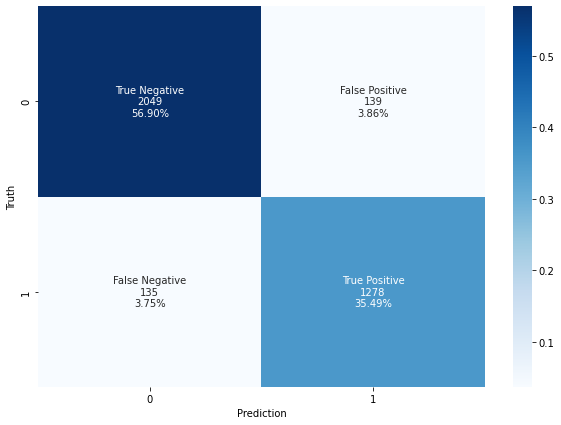

In [77]:
rate_classifier(spam_test_target, majority_voting_classifier_predict)

## Task 1 
Compare the accuracies of the fused model with AdaBoost Ensemble with Decision Tree as the base learner. Train the classifiers using the first 1000 instances and use the remaining 3601 for testing. [25 points]

In [78]:
ada_boost_classifier = AdaBoostClassifier(base_estimator=decision_tree_classifier).fit(spam_training_data, spam_training_target)
ada_boost_classifier_predict = ada_boost_classifier.predict(spam_test_data)

Classification Report
               precision    recall  f1-score   support

         ham       0.91      0.91      0.91      2188
        spam       0.86      0.85      0.86      1413

    accuracy                           0.89      3601
   macro avg       0.88      0.88      0.88      3601
weighted avg       0.89      0.89      0.89      3601

Accuracy Score
 0.887531241321855


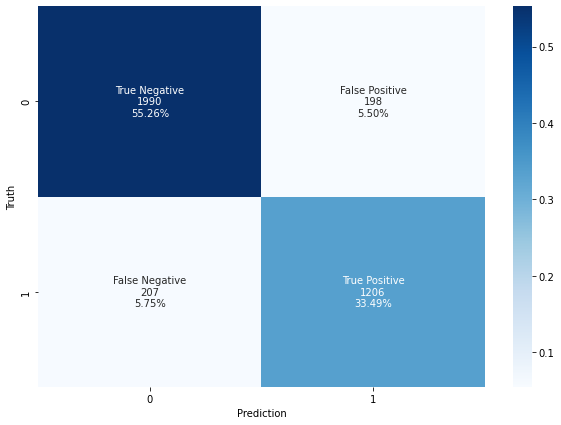

In [79]:
rate_classifier(spam_test_target, ada_boost_classifier_predict)

Classification Report
               precision    recall  f1-score   support

         ham       0.94      0.94      0.94      2188
        spam       0.90      0.90      0.90      1413

    accuracy                           0.92      3601
   macro avg       0.92      0.92      0.92      3601
weighted avg       0.92      0.92      0.92      3601

Accuracy Score
 0.9239100249930575


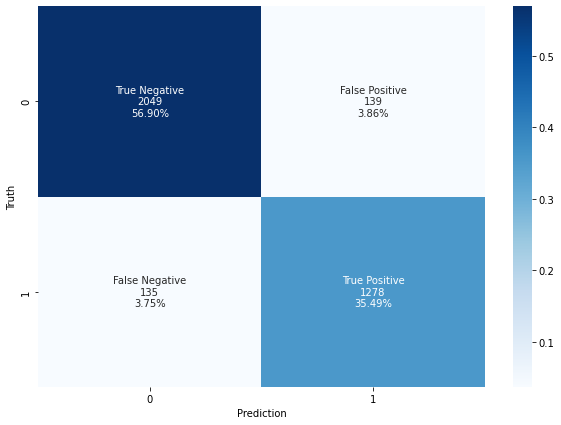

In [80]:
rate_classifier(spam_test_target, majority_voting_classifier_predict)

The Majority Voting Classifier performed better than the ADA_Boost Classifier, with a higher accuracy and lower False Positive/Negative Rate

## Task 2 
Compare the accuracies of the fused model with Random Forest (with 1000 base learners). Train the classifiers using the first 1000 instances and use the remaining 3601 for testing. [25 points]

In [81]:
random_forest_classifier = RandomForestClassifier(n_estimators=1000).fit(spam_training_data, spam_training_target)
random_forest_classifier_predict = random_forest_classifier.predict(spam_test_data)

Classification Report
               precision    recall  f1-score   support

         ham       0.93      0.97      0.95      2188
        spam       0.95      0.88      0.91      1413

    accuracy                           0.93      3601
   macro avg       0.94      0.93      0.93      3601
weighted avg       0.93      0.93      0.93      3601

Accuracy Score
 0.9341849486253818


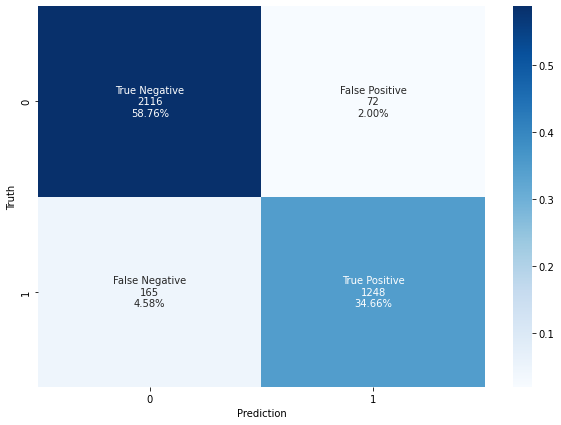

In [82]:
rate_classifier(spam_test_target, random_forest_classifier_predict)

Classification Report
               precision    recall  f1-score   support

         ham       0.94      0.94      0.94      2188
        spam       0.90      0.90      0.90      1413

    accuracy                           0.92      3601
   macro avg       0.92      0.92      0.92      3601
weighted avg       0.92      0.92      0.92      3601

Accuracy Score
 0.9239100249930575


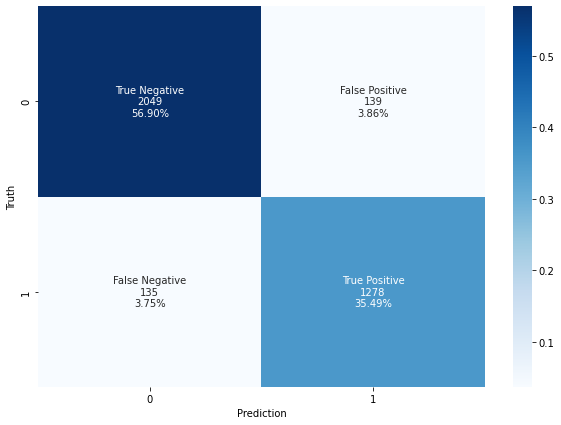

In [83]:
rate_classifier(spam_test_target, majority_voting_classifier_predict)

The Random Forest Classifier performed better than the Majority Voting Classifier, with a higher accuracy and lower False Positive, however it had a higher False Negative Rate by 0.97%

## Task 3 
Study the impact of training sample size on the accuracies of the fused classifier and the AdaBoost Ensemble with Decision Tree as the base learner. Compare their accuracies with the following training-test splits: 
* 50%-50%
* 60%-40%
* 70%-30%
* 80%-20%
* [50 points]

### Task 3.1
* 50%-50% split

Majority Voting 50%-50%

In [84]:
mv_50_50_train_set, mv_50_50_test_set = train_test_split(original_spam_df, test_size=0.50, random_state=99)

In [85]:
mv_50_50_training_data, mv_50_50_training_target = mv_50_50_train_set[non_class_features], mv_50_50_train_set['Class']
mv_50_50_test_data, mv_50_50_test_target = mv_50_50_test_set[non_class_features], mv_50_50_test_set['Class']

In [86]:
print(f'{mv_50_50_training_data.shape = }\n{mv_50_50_test_data.shape = }')

mv_50_50_training_data.shape = (2300, 57)
mv_50_50_test_data.shape = (2301, 57)


In [87]:
decision_tree_mv_50_50 = DecisionTreeClassifier().fit(mv_50_50_training_data, mv_50_50_training_target)
gauss_nb_mv_50_50 = GaussianNB().fit(mv_50_50_training_data, mv_50_50_training_target)
logistic_regression_mv_50_50 = LogisticRegression(max_iter=5000).fit(mv_50_50_training_data, mv_50_50_training_target)

In [88]:
mv_50_50_classifier = VotingClassifier(estimators=[('DT', decision_tree_mv_50_50), ('GNB', gauss_nb_mv_50_50), ('LR', logistic_regression_mv_50_50)], voting='hard')
mv_50_50_classifier = mv_50_50_classifier.fit(mv_50_50_training_data, mv_50_50_training_target)
mv_50_50_classifier_predict = mv_50_50_classifier.predict(mv_50_50_test_data)

ADA Boost 50%-50%

In [90]:
ada_50_50_train_set, ada_50_50_test_set = train_test_split(original_spam_df, test_size=0.50, random_state=99)

In [91]:
ada_50_50_training_data, ada_50_50_training_target = ada_50_50_train_set[non_class_features], ada_50_50_train_set['Class']
ada_50_50_test_data, ada_50_50_test_target = ada_50_50_test_set[non_class_features], ada_50_50_test_set['Class']

In [92]:
print(f'{ada_50_50_training_data.shape = }\n{ada_50_50_test_data.shape = }')

ada_50_50_training_data.shape = (2300, 57)
ada_50_50_test_data.shape = (2301, 57)


In [93]:
ada_boost_50_50_classifier = AdaBoostClassifier(base_estimator=decision_tree_classifier).fit(ada_50_50_training_data, ada_50_50_training_target)
ada_boost_50_50_classifier_predict = ada_boost_50_50_classifier.predict(ada_50_50_test_data)

#### 50%-50% split Comparision:
* Majority Voting [(1) Decision Tree, (2) Gaussian Naïve Bayes, and (3) Logistic Regression]
* ADA Boost [Decision Tree]

Majority Voting 50%-50% Split
Classification Report
               precision    recall  f1-score   support

         ham       0.94      0.93      0.94      1380
        spam       0.90      0.91      0.91       921

    accuracy                           0.92      2301
   macro avg       0.92      0.92      0.92      2301
weighted avg       0.92      0.92      0.92      2301

Accuracy Score
 0.9239461103867883


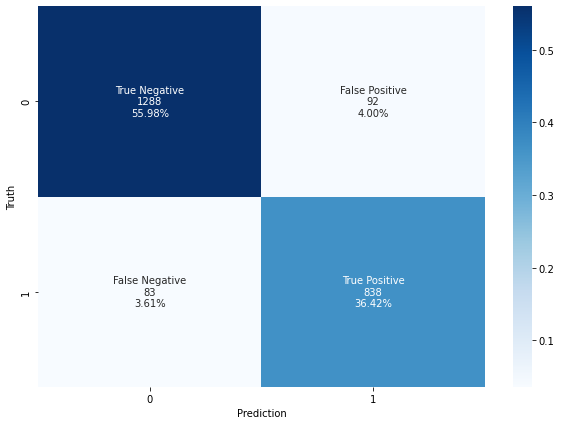

In [134]:
print("Majority Voting 50%-50% Split")
rate_classifier(mv_50_50_test_target, mv_50_50_classifier_predict)

ADA Boost 50%-50% Split
Classification Report
               precision    recall  f1-score   support

         ham       0.93      0.97      0.95      1380
        spam       0.95      0.88      0.92       921

    accuracy                           0.94      2301
   macro avg       0.94      0.93      0.93      2301
weighted avg       0.94      0.94      0.94      2301

Accuracy Score
 0.9356801390699696


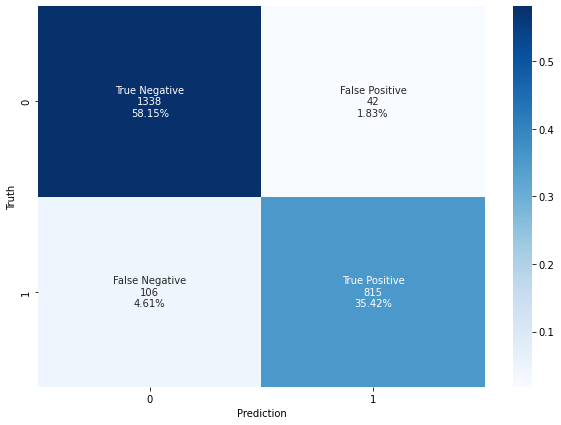

In [135]:
print("ADA Boost 50%-50% Split")
rate_classifier(ada_50_50_test_target, ada_boost_50_50_classifier_predict)

### Task 3.2
* 60%-40% split

Majority Voting 60%-40%

In [95]:
mv_60_40_train_set, mv_60_40_test_set = train_test_split(original_spam_df, test_size=0.40, random_state=99)

In [96]:
mv_60_40_training_data, mv_60_40_training_target = mv_60_40_train_set[non_class_features], mv_60_40_train_set['Class']
mv_60_40_test_data, mv_60_40_test_target = mv_60_40_test_set[non_class_features], mv_60_40_test_set['Class']

In [97]:
print(f'{mv_60_40_training_data.shape = }\n{mv_60_40_test_data.shape = }')

mv_60_40_training_data.shape = (2760, 57)
mv_60_40_test_data.shape = (1841, 57)


In [98]:
decision_tree_mv_60_40 = DecisionTreeClassifier().fit(mv_60_40_training_data, mv_60_40_training_target)
gauss_nb_mv_60_40 = GaussianNB().fit(mv_60_40_training_data, mv_60_40_training_target)
logistic_regression_mv_60_40 = LogisticRegression(max_iter=5000).fit(mv_60_40_training_data, mv_60_40_training_target)

In [99]:
mv_60_40_classifier = VotingClassifier(estimators=[('DT', decision_tree_mv_60_40), ('GNB', gauss_nb_mv_60_40), ('LR', logistic_regression_mv_60_40)], voting='hard')
mv_60_40_classifier = mv_60_40_classifier.fit(mv_60_40_training_data, mv_60_40_training_target)
mv_60_40_classifier_predict = mv_60_40_classifier.predict(mv_60_40_test_data)

Classification Report
               precision    recall  f1-score   support

         ham       0.95      0.93      0.94      1116
        spam       0.90      0.92      0.91       725

    accuracy                           0.93      1841
   macro avg       0.92      0.93      0.92      1841
weighted avg       0.93      0.93      0.93      1841

Accuracy Score
 0.9272134709397066


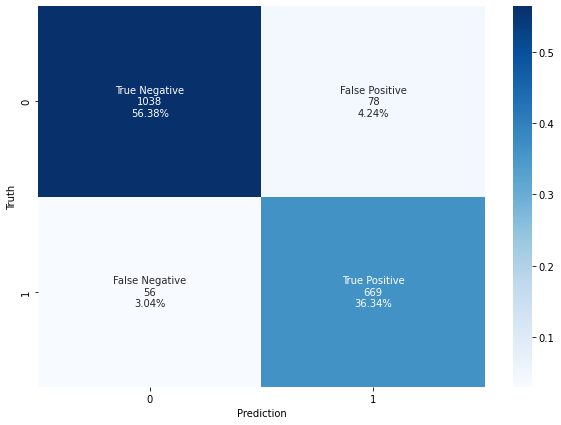

In [100]:
rate_classifier(mv_60_40_test_target, mv_60_40_classifier_predict)

ADA Boost 60%-40%

In [101]:
ada_60_40_train_set, ada_60_40_test_set = train_test_split(original_spam_df, test_size=0.40, random_state=99)

In [102]:
ada_60_40_training_data, ada_60_40_training_target = ada_60_40_train_set[non_class_features], ada_60_40_train_set['Class']
ada_60_40_test_data, ada_60_40_test_target = ada_60_40_test_set[non_class_features], ada_60_40_test_set['Class']

In [103]:
print(f'{ada_60_40_training_data.shape = }\n{ada_60_40_test_data.shape = }')

ada_60_40_training_data.shape = (2760, 57)
ada_60_40_test_data.shape = (1841, 57)


In [104]:
ada_boost_60_40_classifier = AdaBoostClassifier(base_estimator=decision_tree_classifier).fit(ada_60_40_training_data, ada_60_40_training_target)
ada_boost_60_40_classifier_predict = ada_boost_60_40_classifier.predict(ada_60_40_test_data)

Classification Report
               precision    recall  f1-score   support

         ham       0.94      0.97      0.96      1116
        spam       0.96      0.91      0.93       725

    accuracy                           0.95      1841
   macro avg       0.95      0.94      0.95      1841
weighted avg       0.95      0.95      0.95      1841

Accuracy Score
 0.9494839760999457


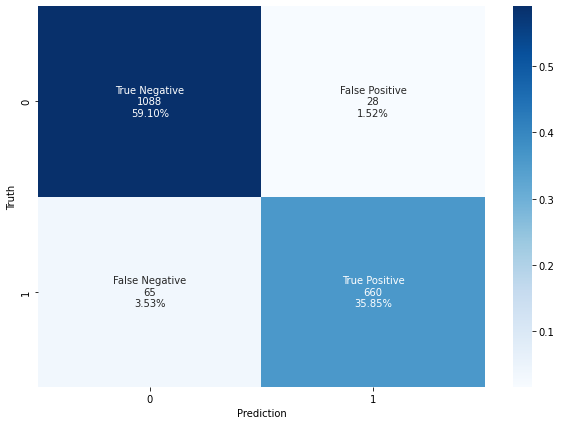

In [105]:
rate_classifier(ada_60_40_test_target, ada_boost_60_40_classifier_predict)

#### 60%-40% split Comparision:
* Majority Voting [(1) Decision Tree, (2) Gaussian Naïve Bayes, and (3) Logistic Regression]
* ADA Boost [Decision Tree]

Majority Voting 60%-40% Split
Classification Report
               precision    recall  f1-score   support

         ham       0.95      0.93      0.94      1116
        spam       0.90      0.92      0.91       725

    accuracy                           0.93      1841
   macro avg       0.92      0.93      0.92      1841
weighted avg       0.93      0.93      0.93      1841

Accuracy Score
 0.9272134709397066


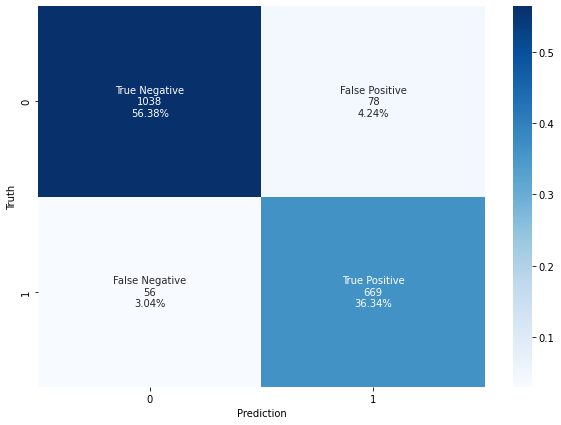

In [132]:
print("Majority Voting 60%-40% Split")
rate_classifier(mv_60_40_test_target, mv_60_40_classifier_predict)

ADA Boost 60%-40% Split
Classification Report
               precision    recall  f1-score   support

         ham       0.94      0.97      0.96      1116
        spam       0.96      0.91      0.93       725

    accuracy                           0.95      1841
   macro avg       0.95      0.94      0.95      1841
weighted avg       0.95      0.95      0.95      1841

Accuracy Score
 0.9494839760999457


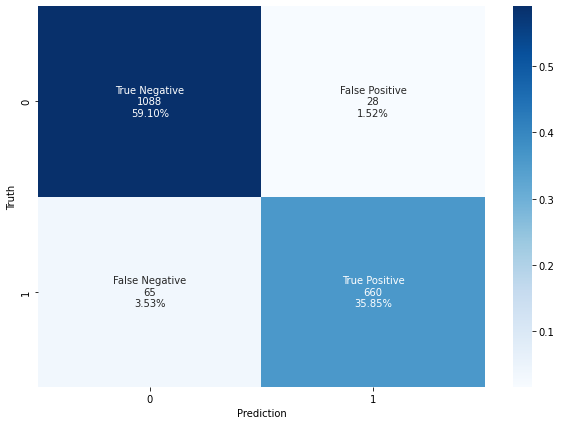

In [133]:
print("ADA Boost 60%-40% Split")
rate_classifier(ada_60_40_test_target, ada_boost_60_40_classifier_predict)

### Task 3.3
* 70%-30% split

Majority Voting 70%-70%

In [106]:
mv_70_30_train_set, mv_70_30_test_set = train_test_split(original_spam_df, test_size=0.30, random_state=99)

In [107]:
mv_70_30_training_data, mv_70_30_training_target = mv_70_30_train_set[non_class_features], mv_70_30_train_set['Class']
mv_70_30_test_data, mv_70_30_test_target = mv_70_30_test_set[non_class_features], mv_70_30_test_set['Class']

In [108]:
print(f'{mv_70_30_training_data.shape = }\n{mv_70_30_test_data.shape = }')

mv_70_30_training_data.shape = (3220, 57)
mv_70_30_test_data.shape = (1381, 57)


In [109]:
decision_tree_mv_70_30 = DecisionTreeClassifier().fit(mv_70_30_training_data, mv_70_30_training_target)
gauss_nb_mv_70_30 = GaussianNB().fit(mv_70_30_training_data, mv_70_30_training_target)
logistic_regression_mv_70_30 = LogisticRegression(max_iter=5000).fit(mv_70_30_training_data, mv_70_30_training_target)

In [110]:
mv_70_30_classifier = VotingClassifier(estimators=[('DT', decision_tree_mv_70_30), ('GNB', gauss_nb_mv_70_30), ('LR', logistic_regression_mv_70_30)], voting='hard')
mv_70_30_classifier = mv_70_30_classifier.fit(mv_70_30_training_data, mv_70_30_training_target)
mv_70_30_classifier_predict = mv_70_30_classifier.predict(mv_70_30_test_data)

Classification Report
               precision    recall  f1-score   support

         ham       0.96      0.93      0.95       842
        spam       0.90      0.94      0.92       539

    accuracy                           0.94      1381
   macro avg       0.93      0.94      0.93      1381
weighted avg       0.94      0.94      0.94      1381

Accuracy Score
 0.9362780593772628


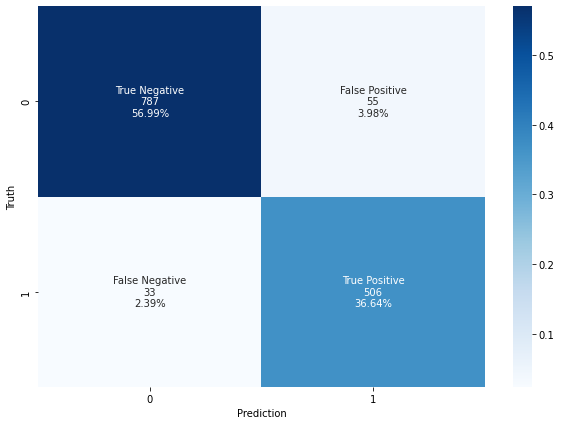

In [111]:
rate_classifier(mv_70_30_test_target, mv_70_30_classifier_predict)

ADA Boost 70%-30%

In [112]:
ada_70_30_train_set, ada_70_30_test_set = train_test_split(original_spam_df, test_size=0.30, random_state=99)

In [113]:
ada_70_30_training_data, ada_70_30_training_target = ada_70_30_train_set[non_class_features], ada_70_30_train_set['Class']
ada_70_30_test_data, ada_70_30_test_target = ada_70_30_test_set[non_class_features], ada_70_30_test_set['Class']

In [114]:
print(f'{ada_70_30_training_data.shape = }\n{ada_70_30_test_data.shape = }')

ada_70_30_training_data.shape = (3220, 57)
ada_70_30_test_data.shape = (1381, 57)


In [115]:
ada_boost_70_30_classifier = AdaBoostClassifier(base_estimator=decision_tree_classifier).fit(ada_70_30_training_data, ada_70_30_training_target)
ada_boost_70_30_classifier_predict = ada_boost_70_30_classifier.predict(ada_70_30_test_data)

Classification Report
               precision    recall  f1-score   support

         ham       0.96      0.97      0.96       842
        spam       0.96      0.93      0.94       539

    accuracy                           0.96      1381
   macro avg       0.96      0.95      0.95      1381
weighted avg       0.96      0.96      0.96      1381

Accuracy Score
 0.9558291093410572


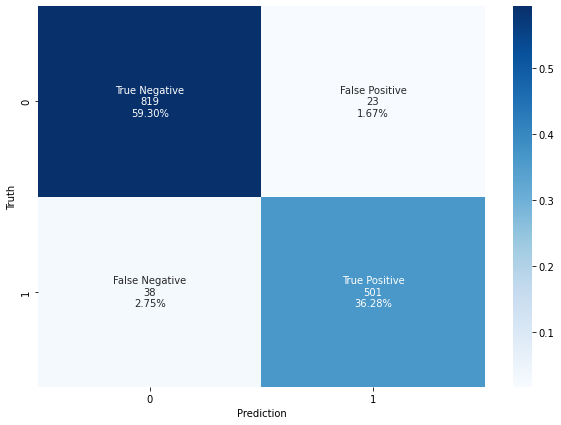

In [116]:
rate_classifier(ada_70_30_test_target, ada_boost_70_30_classifier_predict)

#### 70%-30% split Comparision:
* Majority Voting [(1) Decision Tree, (2) Gaussian Naïve Bayes, and (3) Logistic Regression]
* ADA Boost [Decision Tree]

Majority Voting 70%-30% Split
Classification Report
               precision    recall  f1-score   support

         ham       0.96      0.93      0.95       842
        spam       0.90      0.94      0.92       539

    accuracy                           0.94      1381
   macro avg       0.93      0.94      0.93      1381
weighted avg       0.94      0.94      0.94      1381

Accuracy Score
 0.9362780593772628


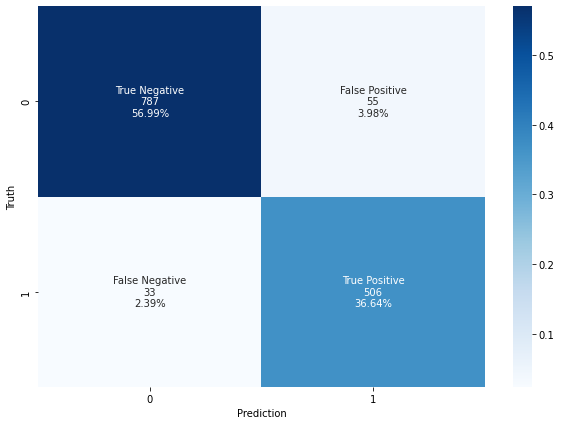

In [130]:
print("Majority Voting 70%-30% Split")
rate_classifier(mv_70_30_test_target, mv_70_30_classifier_predict)

ADA Boost 70%-30% Split
Classification Report
               precision    recall  f1-score   support

         ham       0.96      0.97      0.96       842
        spam       0.96      0.93      0.94       539

    accuracy                           0.96      1381
   macro avg       0.96      0.95      0.95      1381
weighted avg       0.96      0.96      0.96      1381

Accuracy Score
 0.9558291093410572


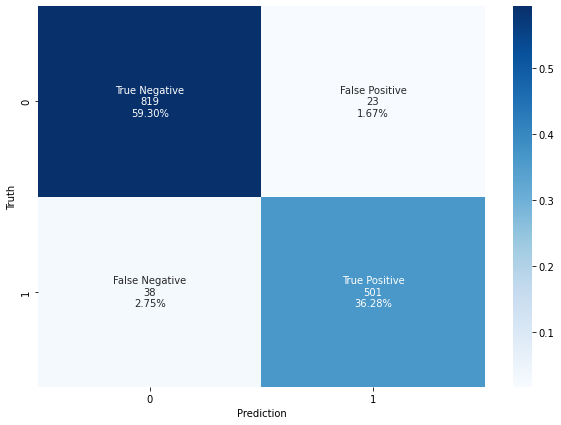

In [131]:
print("ADA Boost 70%-30% Split")
rate_classifier(ada_70_30_test_target, ada_boost_70_30_classifier_predict)

### Task 3.4
* 80%-20% split

Majority Voting 80%-20%

In [117]:
mv_80_20_train_set, mv_80_20_test_set = train_test_split(original_spam_df, test_size=0.20, random_state=99)

In [118]:
mv_80_20_training_data, mv_80_20_training_target = mv_80_20_train_set[non_class_features], mv_80_20_train_set['Class']
mv_80_20_test_data, mv_80_20_test_target = mv_80_20_test_set[non_class_features], mv_80_20_test_set['Class']

In [119]:
print(f'{mv_80_20_training_data.shape = }\n{mv_80_20_test_data.shape = }')

mv_80_20_training_data.shape = (3680, 57)
mv_80_20_test_data.shape = (921, 57)


In [120]:
decision_tree_mv_80_20 = DecisionTreeClassifier().fit(mv_80_20_training_data, mv_80_20_training_target)
gauss_nb_mv_80_20 = GaussianNB().fit(mv_80_20_training_data, mv_80_20_training_target)
logistic_regression_mv_80_20 = LogisticRegression(max_iter=5000).fit(mv_80_20_training_data, mv_80_20_training_target)

In [121]:
mv_80_20_classifier = VotingClassifier(estimators=[('DT', decision_tree_mv_80_20), ('GNB', gauss_nb_mv_80_20), ('LR', logistic_regression_mv_80_20)], voting='hard')
mv_80_20_classifier = mv_80_20_classifier.fit(mv_80_20_training_data, mv_80_20_training_target)
mv_80_20_classifier_predict = mv_80_20_classifier.predict(mv_80_20_test_data)

Classification Report
               precision    recall  f1-score   support

         ham       0.95      0.93      0.94       561
        spam       0.90      0.93      0.91       360

    accuracy                           0.93       921
   macro avg       0.93      0.93      0.93       921
weighted avg       0.93      0.93      0.93       921

Accuracy Score
 0.9315960912052117


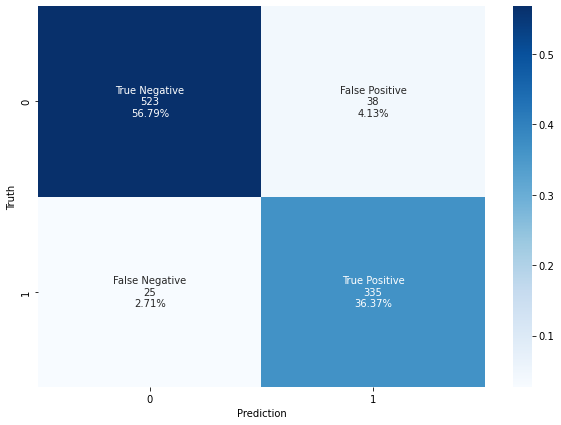

In [122]:
rate_classifier(mv_80_20_test_target, mv_80_20_classifier_predict)

ADA Boost 80%-20%

In [123]:
ada_80_20_train_set, ada_80_20_test_set = train_test_split(original_spam_df, test_size=0.20, random_state=99)

In [124]:
ada_80_20_training_data, ada_80_20_training_target = ada_80_20_train_set[non_class_features], ada_80_20_train_set['Class']
ada_80_20_test_data, ada_80_20_test_target = ada_80_20_test_set[non_class_features], ada_80_20_test_set['Class']

In [125]:
print(f'{ada_80_20_training_data.shape = }\n{ada_80_20_test_data.shape = }')

ada_80_20_training_data.shape = (3680, 57)
ada_80_20_test_data.shape = (921, 57)


In [126]:
ada_boost_80_20_classifier = AdaBoostClassifier(base_estimator=decision_tree_classifier).fit(ada_80_20_training_data, ada_80_20_training_target)
ada_boost_80_20_classifier_predict = ada_boost_80_20_classifier.predict(ada_80_20_test_data)

Classification Report
               precision    recall  f1-score   support

         ham       0.96      0.97      0.96       561
        spam       0.95      0.94      0.94       360

    accuracy                           0.96       921
   macro avg       0.96      0.95      0.95       921
weighted avg       0.96      0.96      0.96       921

Accuracy Score
 0.9565689467969598


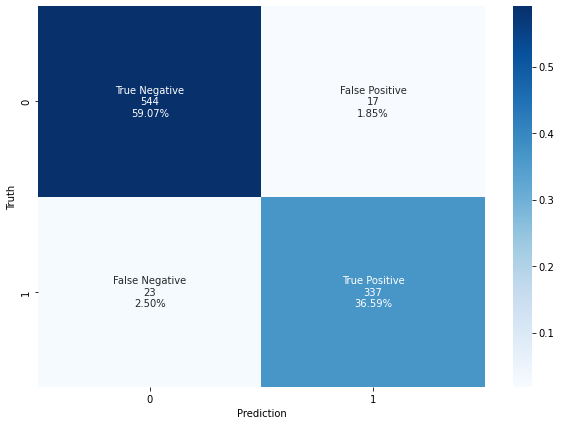

In [127]:
rate_classifier(ada_80_20_test_target, ada_boost_80_20_classifier_predict)

#### 80%-20% split Comparision:
* Majority Voting [(1) Decision Tree, (2) Gaussian Naïve Bayes, and (3) Logistic Regression]
* ADA Boost [Decision Tree]

Majority Voting 80%-20% Split
Classification Report
               precision    recall  f1-score   support

         ham       0.95      0.93      0.94       561
        spam       0.90      0.93      0.91       360

    accuracy                           0.93       921
   macro avg       0.93      0.93      0.93       921
weighted avg       0.93      0.93      0.93       921

Accuracy Score
 0.9315960912052117


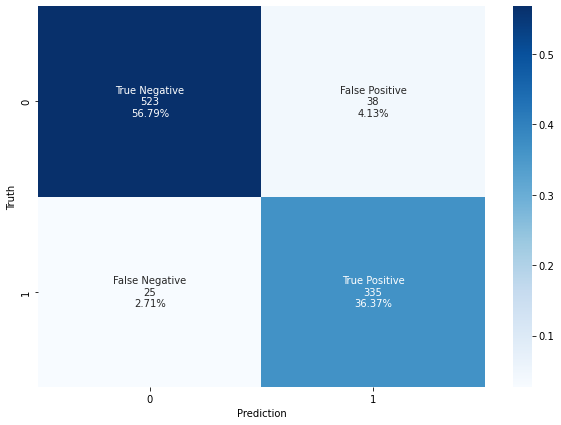

In [128]:
print("Majority Voting 80%-20% Split")
rate_classifier(mv_80_20_test_target, mv_80_20_classifier_predict)

ADA Boost 80%-20% Split
Classification Report
               precision    recall  f1-score   support

         ham       0.96      0.97      0.96       561
        spam       0.95      0.94      0.94       360

    accuracy                           0.96       921
   macro avg       0.96      0.95      0.95       921
weighted avg       0.96      0.96      0.96       921

Accuracy Score
 0.9565689467969598


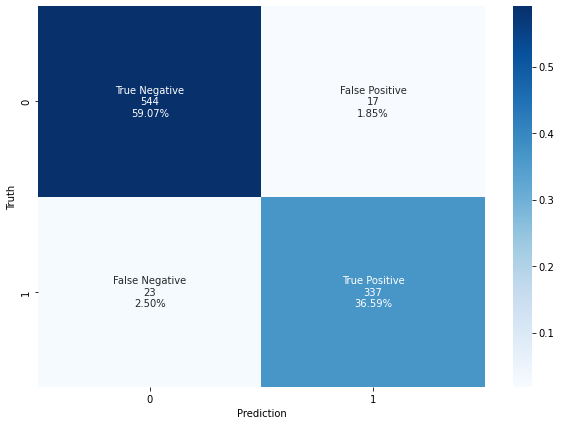

In [129]:
print("ADA Boost 80%-20% Split")
rate_classifier(ada_80_20_test_target, ada_boost_80_20_classifier_predict)